In [1]:
from Processing import *
from ImageHandler import *
from ImageProcessing import *
from GeometryProcessing import *

import globalVar

Found 387 components with height 12.142118863049095 in image


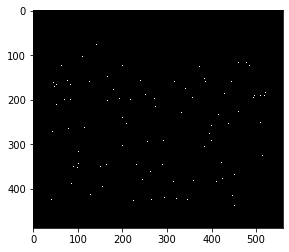

Calculated 110 lines


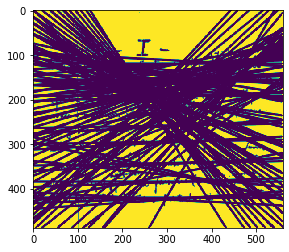

In [2]:
image = loadImage("../Test-data/test.png");
labels, avg_height, centroids, DemoImg, stats = findComponents(image);
linesO = findHoughLines(DemoImg, image, avg_height, 139, 5, 5);

In [3]:
globalVar.init(lines, centroids);

In [8]:
lines = np.copy(linesO);
leftLines = len(lines);
selLines = [];

110 Lines left
3 Lines in this cluster
Value of primary cell 35
31
0
0
Primary Line (120.0, 1.5707964)
Chosen Line (120.0, 1.5707964)
107 Lines left
3 Lines in this cluster
Value of primary cell 31
31
0
0
Primary Line (168.0, 1.535889744758606)
Chosen Line (168.0, 1.535889744758606)
104 Lines left
2 Lines in this cluster
Value of primary cell 31
31
0
0
Primary Line (132.0, 1.535889744758606)
Chosen Line (132.0, 1.535889744758606)
102 Lines left
3 Lines in this cluster
Value of primary cell 31
31
0
0
Primary Line (156.0, 1.5707963705062866)
Chosen Line (156.0, 1.5707963705062866)
99 Lines left
3 Lines in this cluster
Value of primary cell 30
31


KeyboardInterrupt: 

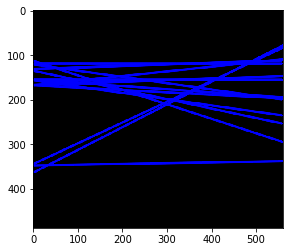

In [9]:
edgyImg = cv.Canny(image, 50, 200, None, 3)
edgyColor = cv.cvtColor(edgyImg, cv.COLOR_GRAY2BGR)
DemoImg = np.zeros_like(edgyColor);

while (True):
    if (leftLines < 1):
        break
    print (str(leftLines) + " Lines left");
    (rho_, theta_), pos_ = findPrimaryCell(lines, centroids)

    f_clus = findClustersize(theta_, avg_height)

    x0 = rho_ - f_clus
    x1 = rho_ + f_clus
    z0 = theta_ - math.radians(3)
    z1 = theta_ + math.radians(3)

    clusCells, clusPos, lines, stop, _ = findcells(x0, x1, z0, z1, lines);
    leftLines = leftLines - len(clusCells);

    if (stop):
        break;
    print (str (len(clusCells)) + " Lines in this cluster" );
    showLines(clusCells, DemoImg)
    n0 = findValueofcell([(rho_, theta_)], centroids, pos_)
    print ("Value of primary cell " + str(n0));

    ntemp = 0
    rho1, theta1 = 0,0
    lpos1 = 0;
    for pos in range(len(clusCells)):
        i = clusCells[pos];
        if (i[0][0] == rho_ and i[0][1] == theta_):
            continue
        temp = findValueofcell(i, centroids, pos)
        if (temp > ntemp):
            ntemp = temp
            rho1 = i[0][0]
            theta1 = i[0][1]
            lpos1 = clusPos[pos];
    
    print (ntemp)
    (rhon, thetan) , pos = compareValueinStructhere([(rho_, theta_)], pos_, [(rho1, theta1)], lpos1, centroids, x0, x1, z0, z1, n0, ntemp)

    print ("Primary Line " + str((rho_, theta_)));
    print ("Chosen Line " + str((rhon, thetan)));
    selLines.append((rhon, thetan));
    showLines([[(rhon, thetan)]], DemoImg);

In [20]:
len(selLines)

12

In [25]:
data = [];
lineData = [];
remove = 0;

for i in range(len(selLines)):
    print ("Working for line " + str(i + 1) + " of " + str(len(selLines)), end = '\r');
    line = selLines[i];
    x1, x2, y1, y2 = findLine(line[0], line[1])
    lineF = Line((x1,y1),(x2,y2));
    labelDataCont = [];
    labelDataNCont = [];
    for i in range(len(stats)):
        stat = stats[i];
        if (stat[4] > 600):
            print("Remove");
            remove += 1;
            continue;
        centroid = centroids[i];
        
        x1, y1 = (int (stat[0]          ), int (stat[1]          ))
        x2, y2 = (int (stat[0] + stat[2]), int (stat[1]          ))
        x3, y3 = (int (stat[0] + stat[2]), int (stat[1] + stat[3]))
        x4, y4 = (int (stat[0]          ), int (stat[1] + stat[3]))

        segment1 = Segment((x1, y1), (x2, y2));
        segment2 = Segment((x2, y2), (x3, y3));
        segment3 = Segment((x3, y3), (x4, y4));
        segment4 = Segment((x4, y4), (x1, y1));

        i1 = lineF.intersection(segment1)
        i2 = lineF.intersection(segment2)
        i3 = lineF.intersection(segment3)
        i4 = lineF.intersection(segment4)

        # Only put if line intersects this component
        if (not (len(i1) == 0 and len(i2) == 0 and len(i3) == 0 and len(i4) == 0)):
            labelDataCont.append([[stat],[centroid],[i1,i2,i3,i4]]);
        else:
            labelDataNCont.append([[stat], [centroid]]);

    lineData.append([labelDataCont,labelDataNCont]);
data.append(lineData);

Removeg for line 1 of 12
Removeg for line 2 of 12
Removeg for line 3 of 12
Removeg for line 4 of 12
Removeg for line 5 of 12
Removeg for line 6 of 12
Removeg for line 7 of 12
Removeg for line 8 of 12
Removeg for line 9 of 12
Removeg for line 10 of 12
Removeg for line 11 of 12
Removeg for line 12 of 12


In [26]:
backupData = data.copy()

In [27]:
validLines = [];
for k in range(len(data[0])):
    line = data[0][k];
    line[0] = sort (line[0]);
    if len(line[0]) > 2 :
        intNeigh = (len(line[0]) - 2) * 2 + 2;
    else:
        intNeigh = len(line[0]);
    extNeigh = 0;
    for i in range(1, len(line[0]) - 1):
        comp = line[0][i];
        extDistance = extDist(line[0], i);
        
        print ("External Distance : " + str(int(extDistance)), end = '\r');

        for j in range(len(line[1])):
            stat = line[1][j];
            if (stat == []):
                continue;
            dist = findDistanceBWcomp(comp[1][0], stat[1][0]);

            if (dist < extDistance):
                extNeigh += 1;
                line[1][j] = [];
    print ("External neighbour : " + str(extNeigh) + " Internal neighbour: " + str(intNeigh))
    if (extNeigh > intNeigh):
        validLines.append([selLines[k]]);


External neighbour : 6 Internal neighbour: 14
External neighbour : 0 Internal neighbour: 2
External neighbour : 0 Internal neighbour: 2
External neighbour : 2 Internal neighbour: 4
External neighbour : 4 Internal neighbour: 6
External neighbour : 14 Internal neighbour: 6
External neighbour : 0 Internal neighbour: 2
External neighbour : 6 Internal neighbour: 6
External neighbour : 0 Internal neighbour: 2
External neighbour : 3 Internal neighbour: 4
External neighbour : 0 Internal neighbour: 2
External neighbour : 0 Internal neighbour: 2


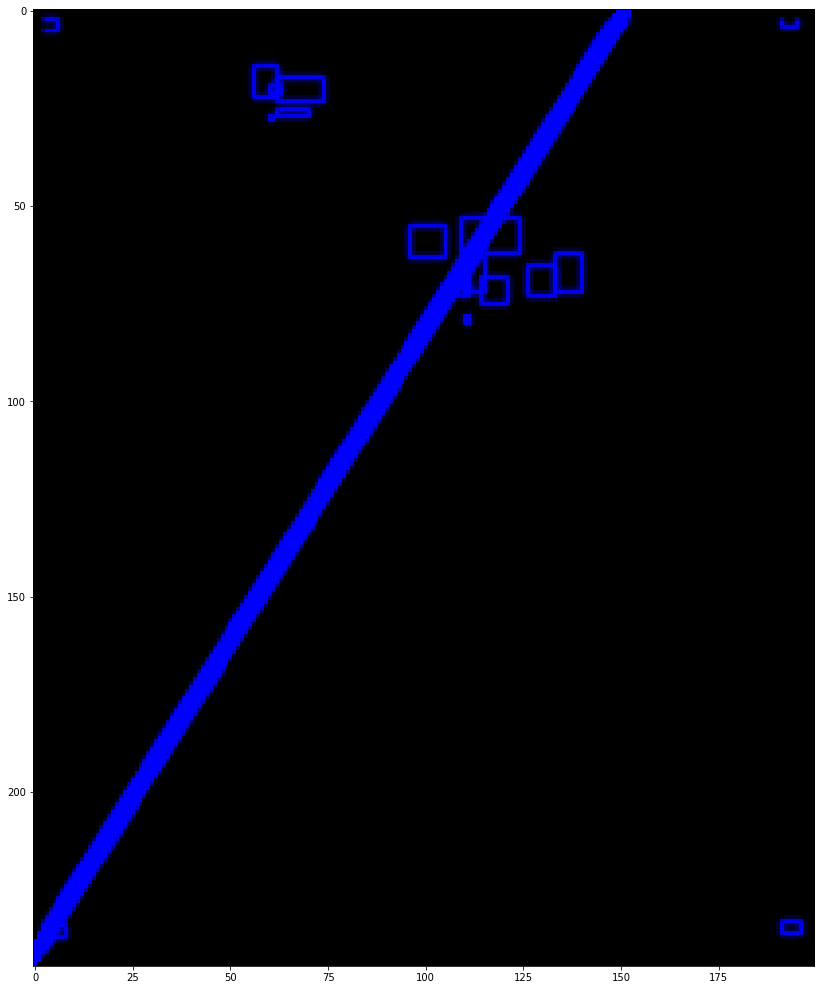

In [28]:
showLines(validLines, DemoImg);

In [77]:
data

[]

In [252]:
selLines[0]

(120.0, 1.5707964)

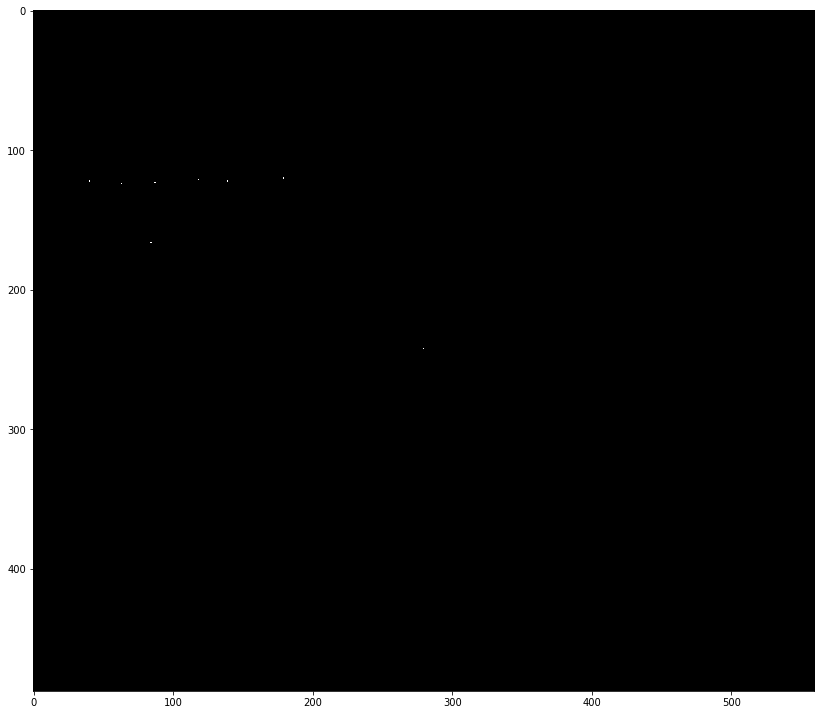

In [47]:
DemoImg[int(data[0][0][0][0][1][0][1]), int(data[0][0][0][0][1][0][0])] = [255,255,255]
DemoImg[int(data[0][0][0][1][1][0][1]), int(data[0][0][0][1][1][0][0])] = [255,255,255]
DemoImg[int(data[0][0][0][2][1][0][1]), int(data[0][0][0][2][1][0][0])] = [255,255,255]
DemoImg[int(data[0][0][0][3][1][0][1]), int(data[0][0][0][3][1][0][0])] = [255,255,255]
DemoImg[int(data[0][0][0][4][1][0][1]), int(data[0][0][0][4][1][0][0])] = [255,255,255]
DemoImg[int(data[0][0][0][5][1][0][1]), int(data[0][0][0][5][1][0][0])] = [255,255,255]
DemoImg[int(data[0][0][0][6][1][0][1]), int(data[0][0][0][6][1][0][0])] = [255,255,255]
DemoImg[int(data[0][0][0][7][1][0][1]), int(data[0][0][0][7][1][0][0])] = [255,255,255]
plt.imshow(DemoImg)
plt.show()

In [55]:
data[0][0][0][6]

[[array([126, 115,  26,  14,  97], dtype=int32)],
 [array([139.20618557, 122.49484536])],
 [[Point2D(126, 239007/1999)],
  [Point2D(1004994/7003, 837363/7003)],
  [Point2D(152, 239033/1999)],
  [Point2D(940033/6990, 835777/6990)]]]

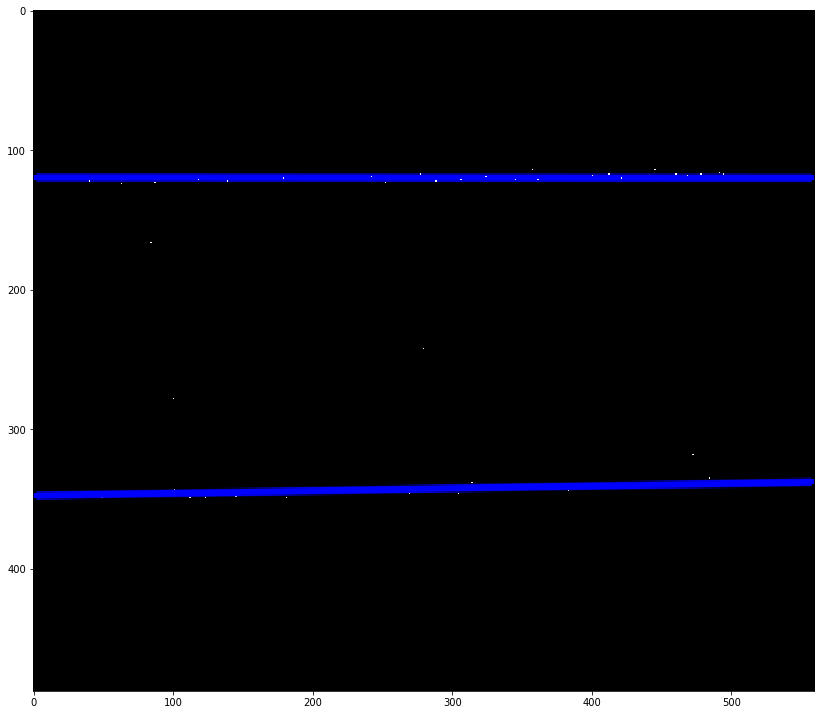

In [39]:
showLines([[selLines[4]]], DemoImg)

In [81]:
edgyImg = cv.Canny(image, 50, 200, None, 3)
edgyColor = cv.cvtColor(edgyImg, cv.COLOR_GRAY2BGR)

DemoImg = np.zeros_like(edgyColor);


In [3]:
rcParams['figure.figsize'] = 14, 28

In [38]:
selLines[4]

(348.0, 1.5533430576324463)

In [61]:
area = 0;
for stat in stats:
    area += stat[4]

In [63]:
area/387

706.1498708010336

In [65]:
## write code for which components to consider and which not to.

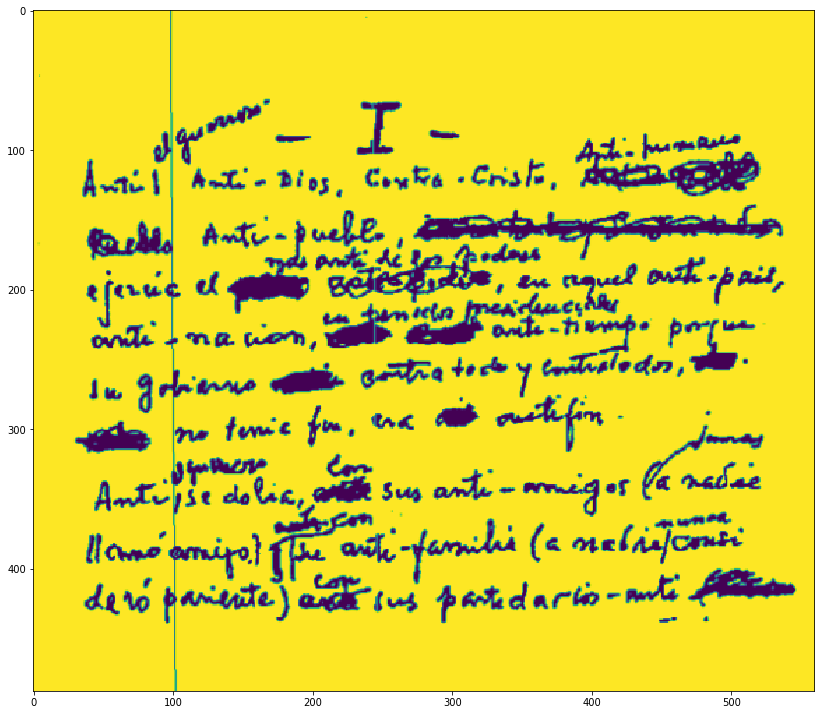

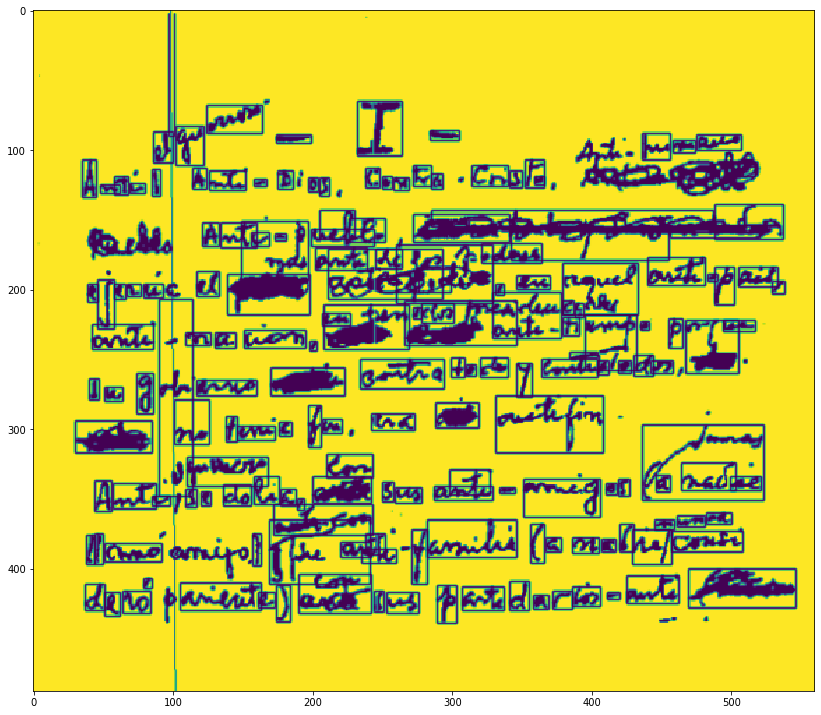

In [4]:
image = loadImage("../Test-data/test.png");
edgyImg = cv.Canny(image, 50, 200, None, 3)
edgyColor = cv.cvtColor(edgyImg, cv.COLOR_GRAY2BGR)
DemoImg = np.zeros_like(edgyColor);

for stat in stats:
    if (stat[4] > 350 or stat[4] < 20):
        continue;
    pt1 = (stat[0]          , stat[1]          )
    pt2 = (stat[0] + stat[2], stat[1]          )
    pt3 = (stat[0] + stat[2], stat[1] + stat[3])
    pt4 = (stat[0]          , stat[1] + stat[3])
    cv.line(image, pt1, pt2, (0,0,255), 1, cv.LINE_AA)
    cv.line(image, pt2, pt3, (0,0,255), 1, cv.LINE_AA)
    cv.line(image, pt3, pt4, (0,0,255), 1, cv.LINE_AA)
    cv.line(image, pt4, pt1, (0,0,255), 1, cv.LINE_AA)
plt.imshow(image);

In [6]:
def compareValueinStructhere(cell0, lpos0, cell1, lpos1, centroids, x0, x1, z0, z1, n0, n1):
    vertices = findPointsofRect(x0, x1, z0, z1);

    rect = Polygon(vertices[0], vertices[1], vertices[2], vertices[3])
    points = [];

    for point in centroids:
        if (rect.encloses_point(point)):
            points.append(point)

    cell0V = findValueofcell(cell0, points, lpos0)
    cell1V = findValueofcell(cell1, points, lpos1)
    
    print (cell0V)
    print (cell1V)
    

    if ((n1/n0)>0.65 and cell1V>cell0V):
        return cell1[0] , lpos1
    else:
        return cell0[0] , lpos0